# 使用dplyr进行数据转换

1. 使用dplyr进行数据转换主要使用***tidyverse***包和***nycflights13***数据包

2. dplyr五个核心函数

    a. 按值筛选函数***filter()***
    
    b. 对行重新排序函数***arrange()***
    
    c. 按名称选取变量函数***select()***
    
    d. 创建新变量函数***mutate()***
    
    e. 获得摘要统计量函数***summarize()***

In [50]:
# 加载包
# install.packages("Lahman")
library(Lahman)
library(tidyverse)
library(nycflights13)

查看flights数据
![tibble截图](image/tibble.png)
jupyter对于tibble数据框的显示不如rstudio好，看截图

In [51]:
head(flights)
str(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	336776 obs. of  19 variables:
 $ year          : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int  517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int  515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num  2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int  830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int  819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num  11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr  "UA" "UA" "AA" "B6" ...
 $ flight        : int  1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr  "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr  "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr  "IAH" "IAH" "MIA" "BQN" ...
 $ air_time      : num  227 227 160 183 116 150 158 53 140 138 ...
 $ distanc

## 使用filter()筛选行

In [52]:
# 筛选1月1日的航班,数据有点多，使用head()函数仅仅显示前6行,下同
head(filter(flights, month == 1, day == 1))
#注意是两个等号“==”

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


dplyr函数不会修改输入，如果要保存结果需要使用赋值操作“<-”

如果既要输出结果，又要保存结果，则使用"()"将赋值操作括起来

In [53]:
head(fm1d1 <- filter(flights, month == 1, day == 1))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


除了使用等于"=="，还可以使用其他比较运算符"!="、">"、"<="，以及逻辑运算符
"&"、"|"、"!"

In [54]:
# 实践一下，找出8月中旬的航班与12月的航班
head(eord <- filter(flights, month == 8 & day >= 10 & day <= 20 | month == 2))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,2,1,456,500,-4,652,648,4,US,1117,N197UW,EWR,CLT,98,529,5,0,2013-02-01 05:00:00
2013,2,1,520,525,-5,816,820,-4,UA,1018,N24211,EWR,IAH,209,1400,5,25,2013-02-01 05:00:00
2013,2,1,527,530,-3,837,829,8,UA,650,N470UA,LGA,IAH,233,1416,5,30,2013-02-01 05:00:00
2013,2,1,532,540,-8,1007,1017,-10,B6,725,N554JB,JFK,BQN,195,1576,5,40,2013-02-01 05:00:00
2013,2,1,540,540,0,859,850,9,AA,1141,N615AA,JFK,MIA,169,1089,5,40,2013-02-01 05:00:00
2013,2,1,552,600,-8,714,715,-1,EV,5716,N829AS,JFK,IAD,58,228,6,0,2013-02-01 06:00:00


In [55]:
# 检查一下上面筛选的有没有问题
# 使用t()函数转置一下

unique(eord$month)#是否只有8月和12月

t(unique(filter(eord, month == 8)$day))# 8月是否是中旬

matrix(unique(filter(eord, month == 2)$day),ncol = 7, byrow = T)# 12月是否是全月
# 为了显示，转成了矩阵，,刚好2月是7的整数倍，不然不足的就自动填充了

[1] 2 8

10,11,12,13,14,15,16,17,18,19,20


1,2,3,4,5,6,7
8,9,10,11,12,13,14
15,16,17,18,19,20,21
22,23,24,25,26,27,28


复杂的表达式最好用小括号括起来，看起来更清楚，而且很多复杂表达式可以简化

还有一种操作是"%in%"

In [56]:
# 筛选出7-9月的航班
head(filter(flights, month %in% c(7:9)))
tail(filter(flights, month %in% c(7:9)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,1,1,2029,212,236,2359,157,B6,915,N653JB,JFK,SFO,315,2586,20,29,2013-07-01 20:00:00
2013,7,1,2,2359,3,344,344,0,B6,1503,N805JB,JFK,SJU,200,1598,23,59,2013-07-01 23:00:00
2013,7,1,29,2245,104,151,1,110,B6,234,N348JB,JFK,BTV,66,266,22,45,2013-07-01 22:00:00
2013,7,1,43,2130,193,322,14,188,B6,1371,N794JB,LGA,FLL,143,1076,21,30,2013-07-01 21:00:00
2013,7,1,44,2150,174,300,100,120,AA,185,N324AA,JFK,LAX,297,2475,21,50,2013-07-01 21:00:00
2013,7,1,46,2051,235,304,2358,186,B6,165,N640JB,JFK,PDX,304,2454,20,51,2013-07-01 20:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,9,30,NA,1842,NA,NA,2019,NA,EV,5274,N740EV,LGA,BNA,NA,764,18,42,2013-09-30 18:00:00
2013,9,30,NA,1455,NA,NA,1634,NA,9E,3393,NA,JFK,DCA,NA,213,14,55,2013-09-30 14:00:00
2013,9,30,NA,2200,NA,NA,2312,NA,9E,3525,NA,LGA,SYR,NA,198,22,0,2013-09-30 22:00:00
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


缺失值"NA"是一个复杂的问题，***filter()***函数会自动排除缺失值的行，
***is.na()***可以判别是否是缺失值

书上说可以用***between()***函数简化一些代码，不知如何实现

## 使用arrange()排列行

In [57]:
arrange(flights, desc(month), desc(is.na(dep_time)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,1,NA,1200,NA,NA,1314,NA,9E,2902,NA,JFK,BOS,NA,187,12,0,2013-12-01 12:00:00
2013,12,1,NA,830,NA,NA,1039,NA,9E,3385,NA,EWR,MSP,NA,1008,8,30,2013-12-01 08:00:00
2013,12,1,NA,2229,NA,NA,2343,NA,B6,234,N192JB,JFK,BTV,NA,266,22,29,2013-12-01 22:00:00
2013,12,1,NA,631,NA,NA,742,NA,EV,4194,N13975,EWR,DCA,NA,199,6,31,2013-12-01 06:00:00
2013,12,1,NA,620,NA,NA,826,NA,EV,5178,N614QX,EWR,MSP,NA,1008,6,20,2013-12-01 06:00:00
2013,12,1,NA,700,NA,NA,834,NA,UA,643,NA,EWR,ORD,NA,719,7,0,2013-12-01 07:00:00
2013,12,2,NA,1050,NA,NA,1259,NA,EV,3852,N16963,EWR,DTW,NA,488,10,50,2013-12-02 10:00:00
2013,12,2,NA,1010,NA,NA,1129,NA,EV,5736,N820AS,LGA,IAD,NA,229,10,10,2013-12-02 10:00:00
2013,12,2,NA,1845,NA,NA,2026,NA,EV,5274,N709EV,LGA,BNA,NA,764,18,45,2013-12-02 18:00:00


arrange()就三个可说的用法

分别是，正序排、逆序排、NA排前面以及复合排序

In [58]:
# 正序排
head(arrange(flights, month))

head(arrange(flights, dep_time))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,13,1,2249,72,108,2357,71,B6,22,N206JB,JFK,SYR,41,209,22,49,2013-01-13 22:00:00
2013,1,31,1,2100,181,124,2225,179,WN,530,N550WN,LGA,MDW,127,725,21,0,2013-01-31 21:00:00
2013,11,13,1,2359,2,442,440,2,B6,1503,N627JB,JFK,SJU,194,1598,23,59,2013-11-13 23:00:00
2013,12,16,1,2359,2,447,437,10,B6,839,N607JB,JFK,BQN,202,1576,23,59,2013-12-16 23:00:00
2013,12,20,1,2359,2,430,440,-10,B6,1503,N608JB,JFK,SJU,182,1598,23,59,2013-12-20 23:00:00
2013,12,26,1,2359,2,437,440,-3,B6,1503,N527JB,JFK,SJU,197,1598,23,59,2013-12-26 23:00:00


In [59]:
# 逆序排
head(arrange(flights, desc(day)))

head(arrange(flights, desc(dep_delay)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,31,1,2100,181,124,2225,179,WN,530,N550WN,LGA,MDW,127,725,21,0,2013-01-31 21:00:00
2013,1,31,4,2359,5,455,444,11,B6,739,N599JB,JFK,PSE,206,1617,23,59,2013-01-31 23:00:00
2013,1,31,7,2359,8,453,437,16,B6,727,N505JB,JFK,BQN,197,1576,23,59,2013-01-31 23:00:00
2013,1,31,12,2250,82,132,7,85,B6,30,N178JB,JFK,ROC,60,264,22,50,2013-01-31 22:00:00
2013,1,31,26,2154,152,328,50,158,B6,515,N663JB,EWR,FLL,161,1065,21,54,2013-01-31 21:00:00
2013,1,31,34,2159,155,135,2315,140,EV,4162,N24128,EWR,BTV,43,266,21,59,2013-01-31 21:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


In [60]:
# NA排前面（默认NA是排在末尾的）
tail(arrange(flights, dep_time))
tail(arrange(flights, desc(dep_time)))

# 使用is.na()函数将NA排在前面
head(arrange(flights, is.na(dep_time)))
## 并没有
head(arrange(flights, desc(is.na(dep_time))))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,9,30,NA,1842,NA,NA,2019,NA,EV,5274,N740EV,LGA,BNA,NA,764,18,42,2013-09-30 18:00:00
2013,9,30,NA,1455,NA,NA,1634,NA,9E,3393,NA,JFK,DCA,NA,213,14,55,2013-09-30 14:00:00
2013,9,30,NA,2200,NA,NA,2312,NA,9E,3525,NA,LGA,SYR,NA,198,22,0,2013-09-30 22:00:00
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,9,30,NA,1842,NA,NA,2019,NA,EV,5274,N740EV,LGA,BNA,NA,764,18,42,2013-09-30 18:00:00
2013,9,30,NA,1455,NA,NA,1634,NA,9E,3393,NA,JFK,DCA,NA,213,14,55,2013-09-30 14:00:00
2013,9,30,NA,2200,NA,NA,2312,NA,9E,3525,NA,LGA,SYR,NA,198,22,0,2013-09-30 22:00:00
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00


In [61]:
# 复合排序就是指定多条件进行排序

# 按month正序排、按day逆序排、将dep_delay的NA排在前面
head(arrange(flights, month, desc(day), desc(is.na(dep_delay))))

tail(arrange(flights, month, desc(day), desc(is.na(dep_delay))))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,31,NA,1145,NA,NA,1410,NA,DL,401,N309DE,EWR,ATL,NA,746,11,45,2013-01-31 11:00:00
2013,1,31,NA,817,NA,NA,1127,NA,DL,1109,N330NW,LGA,TPA,NA,1010,8,17,2013-01-31 08:00:00
2013,1,31,NA,800,NA,NA,1122,NA,DL,1271,N935DL,JFK,FLL,NA,1069,8,0,2013-01-31 08:00:00
2013,1,31,NA,1230,NA,NA,1459,NA,EV,3826,N11176,EWR,ATL,NA,746,12,30,2013-01-31 12:00:00
2013,1,31,NA,1527,NA,NA,1700,NA,EV,3835,N16561,EWR,BNA,NA,748,15,27,2013-01-31 15:00:00
2013,1,31,NA,1545,NA,NA,1815,NA,DL,1942,N342NB,EWR,ATL,NA,746,15,45,2013-01-31 15:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,1,2251,2200,51,50,33,17,UA,668,N460UA,LGA,DEN,223,1620,22,0,2013-12-01 22:00:00
2013,12,1,2255,2250,5,1,2356,5,B6,1816,N258JB,JFK,SYR,43,209,22,50,2013-12-01 22:00:00
2013,12,1,2258,2300,-2,2350,10,-20,UA,1525,N34282,EWR,BOS,40,200,23,0,2013-12-01 23:00:00
2013,12,1,2301,1955,186,19,2146,153,EV,5038,N615QX,LGA,BHM,122,866,19,55,2013-12-01 19:00:00
2013,12,1,2321,2300,21,23,28,-5,UA,1446,N12221,EWR,ORD,105,719,23,0,2013-12-01 23:00:00
2013,12,1,2354,2359,-5,429,440,-11,B6,1503,N509JB,JFK,SJU,194,1598,23,59,2013-12-01 23:00:00


## 使用select()选择列

In [62]:
# select()可以按变量名快速选择子集
head(select(flights, year,month,day))
head(select(flights, year:day))
head(select(flights, -(year:day)))

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


###  select()函数中的辅助函数

starts_with()、ends_with()、contains()、matches()，分别是什么应该能看出来


In [63]:
head(select(flights, starts_with("dep")))

head(select(flights, ends_with("time")))

head(select(flights, contains("ou")))

head(select(flights, matches("^arr")))# 正则表达式匹配"arr"开头

head(select(flights, matches("[iou]")))# 正则表达式匹配行名包含"iou"的列

# 正则表达式非常有用!!!

dep_time,dep_delay
<int>,<dbl>
517,2
533,4
542,2
544,-1
554,-6
554,-4


dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<int>,<int>,<int>,<int>,<dbl>
517,515,830,819,227
533,529,850,830,227
542,540,923,850,160
544,545,1004,1022,183
554,600,812,837,116
554,558,740,728,150


hour,time_hour
<dbl>,<dttm>
5,2013-01-01 05:00:00
5,2013-01-01 05:00:00
5,2013-01-01 05:00:00
5,2013-01-01 05:00:00
6,2013-01-01 06:00:00
5,2013-01-01 05:00:00


arr_time,arr_delay
<int>,<dbl>
830,11
850,20
923,33
1004,-18
812,-25
740,12


month,dep_time,sched_dep_time,arr_time,sched_arr_time,carrier,flight,tailnum,origin,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,517,515,830,819,UA,1545,N14228,EWR,227,1400,5,15,2013-01-01 05:00:00
1,533,529,850,830,UA,1714,N24211,LGA,227,1416,5,29,2013-01-01 05:00:00
1,542,540,923,850,AA,1141,N619AA,JFK,160,1089,5,40,2013-01-01 05:00:00
1,544,545,1004,1022,B6,725,N804JB,JFK,183,1576,5,45,2013-01-01 05:00:00
1,554,600,812,837,DL,461,N668DN,LGA,116,762,6,0,2013-01-01 06:00:00
1,554,558,740,728,UA,1696,N39463,EWR,150,719,5,58,2013-01-01 05:00:00


In [64]:
# 使用rename()函数重命名将tailnum改为tail_t_num
head(select(flights, contains("num")))

head(select(rename(flights, tail_t_num = tailnum),contains("num")))

tailnum
<chr>
N14228
N24211
N619AA
N804JB
N668DN
N39463


tail_t_num
<chr>
N14228
N24211
N619AA
N804JB
N668DN
N39463


In [65]:
# 使用everything()函数将某列或某几列放到前面
head(select(flights, time_hour, tailnum, everything()))

time_hour,tailnum,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute
<dttm>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,N14228,2013,1,1,517,515,2,830,819,11,UA,1545,EWR,IAH,227,1400,5,15
2013-01-01 05:00:00,N24211,2013,1,1,533,529,4,850,830,20,UA,1714,LGA,IAH,227,1416,5,29
2013-01-01 05:00:00,N619AA,2013,1,1,542,540,2,923,850,33,AA,1141,JFK,MIA,160,1089,5,40
2013-01-01 05:00:00,N804JB,2013,1,1,544,545,-1,1004,1022,-18,B6,725,JFK,BQN,183,1576,5,45
2013-01-01 06:00:00,N668DN,2013,1,1,554,600,-6,812,837,-25,DL,461,LGA,ATL,116,762,6,0
2013-01-01 05:00:00,N39463,2013,1,1,554,558,-4,740,728,12,UA,1696,EWR,ORD,150,719,5,58


In [66]:
#  one_of()函数的作用是什么？

vars <-c( "year", "month", "day", "dep_delay", "arr_delay")

head(select(flights, vars))

year,month,day,dep_delay,arr_delay
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,2,11
2013,1,1,4,20
2013,1,1,2,33
2013,1,1,-1,-18
2013,1,1,-6,-25
2013,1,1,-4,12


## 使用mutate()添加新变量

In [67]:
# mutate就是以原有列为基础进行运算，在最后添加新的列

flights_sml <- select(flights, year:day,ends_with("delay"),
                     distance, air_time)

head(mutate(flights_sml, gain = arr_delay - dep_delay,
      speed = distance / air_time * 60))

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,9,370.0441
2013,1,1,4,20,1416,227,16,374.2731
2013,1,1,2,33,1089,160,31,408.3750
2013,1,1,-1,-18,1576,183,-17,516.7213
2013,1,1,-6,-25,762,116,-19,394.1379
2013,1,1,-4,12,719,150,16,287.6000


In [68]:
head(flights_sml)# 原始数据依旧没有修改

year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


In [69]:
head(mutate(flights_sml,
      gain = arr_delay - dep_delay,
      hours = air_time / 60,
      gain_per_hour = gain / hours))

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,9,3.783333,2.378855
2013,1,1,4,20,1416,227,16,3.783333,4.229075
2013,1,1,2,33,1089,160,31,2.666667,11.625000
2013,1,1,-1,-18,1576,183,-17,3.050000,-5.573770
2013,1,1,-6,-25,762,116,-19,1.933333,-9.827586
2013,1,1,-4,12,719,150,16,2.500000,6.400000


In [70]:
# 如果只想保留新变量，使用transmute()函数
head(transmute(flights_sml,
      gain = arr_delay - dep_delay,
      hours = air_time / 60,
      gain_per_hour = gain / hours))

head(flights_sml)# 原数据依旧没变

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
9,3.783333,2.378855
16,3.783333,4.229075
31,2.666667,11.625000
-17,3.050000,-5.573770
-19,1.933333,-9.827586
16,2.500000,6.400000


year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227
2013,1,1,4,20,1416,227
2013,1,1,2,33,1089,160
2013,1,1,-1,-18,1576,183
2013,1,1,-6,-25,762,116
2013,1,1,-4,12,719,150


### 常用创建函数

创建新变量的多种函数可供你同mutate()一同使用。
最重要的一点是，这种函数必须是向量化的：
它必须接受一个向量作为输入，并返回一个向量作为输出，
而且输入向量与输出向量具有同样数目的分量。

1. 算数运算符：+ 、- 、* 、/ 、^

2. 模运算符：%/%(整除) 、%%(取余)

3. 对数：log() 、logx() 、log10()

4. 偏移函数：lead() 、lag()

5. 逻辑比较：< 、<= 、> 、>= 、!=

6. 排秩

7. 累加和滚动聚合

In [71]:
# 偏移函数一看例子就懂，不解释
t(x <- 1:10)
t(lag(x))
t(lead(x))

1,2,3,4,5,6,7,8,9,10


NA,1,2,3,4,5,6,7,8,9


2,3,4,5,6,7,8,9,10,NA


这样看不出来偏移函数用法，学了group_by()
之后还不明白可以参考下面的链接
[巧用偏移函数](https://cloud.tencent.com/developer/article/1429995)

秩(rank)，顾名思义就是秩序的意思，不懂的百度

几个排秩函数：min_rank()、row_number()、dense_rank()、
percent_rank()、cume_dist()、mtile()

目前会用min_rank()即可

In [72]:
y <- c(1,2,3,2,NA,4)
t(sort(y))
t(min_rank(y))# 最小值获得最前面的名次
t(min_rank(desc(y)))

1,2,2,3,4


1,2,4,2,NA,5


5,3,2,3,NA,1


In [73]:
## 累加和滚动聚合也不难

# R提供了计算累加和、累加积、累加最小值和累加最大值的函数：

# cumsum()、cumprod()、cummin()和cummax()；

# dplyr还提供了cummean()函数以计算累加均值。

t(x <- 1:10)
 
t(cumsum(x))# 和

t(cumprod(x)) # 积

t(cummin(x))# min

t(cummax(x))# max

t(cummean(x))# mean

1,2,3,4,5,6,7,8,9,10


1,3,6,10,15,21,28,36,45,55


1,2,6,24,120,720,5040,40320,362880,3628800


1,1,1,1,1,1,1,1,1,1


1,2,3,4,5,6,7,8,9,10


1,1.5,2,2.5,3,3.5,4,4.5,5,5.5


cummin()和cummax()不是很好理解吧

和下面的例子对比也许就懂了

In [74]:
t(z <- 10:1)
t(cummin(z))
t(cummax(z))

# 还可以执行example(cummin)看一下官方例子

10,9,8,7,6,5,4,3,2,1


10,9,8,7,6,5,4,3,2,1


10,10,10,10,10,10,10,10,10,10


In [75]:
example(cummin)


cummin> cumsum(1:10)
 [1]  1  3  6 10 15 21 28 36 45 55

cummin> cumprod(1:10)
 [1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

cummin> cummin(c(3:1, 2:0, 4:2))
[1] 3 2 1 1 1 0 0 0 0

cummin> cummax(c(3:1, 2:0, 4:2))
[1] 3 3 3 3 3 3 4 4 4


## 使用summarize()进行分组摘要

In [76]:
# 一个简单用法
summarise(flights, delay = mean(dep_delay, na.rm = T))
# 对dep_delay求均值

delay
<dbl>
12.63907


summarize()如果不与group_by()一起使用，也就没什么用；
group_by()起的作用就是对数据集分组

In [77]:
by_day <- group_by(flights, year, month, day)
head(summarise(by_day,delay = mean(dep_delay, na.rm = T)))
# 这即是获得每日平均延误时间

year,month,day,delay
<int>,<int>,<int>,<dbl>
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014


group_by()和summarize()的组合构成了使用dplyr包时最常用的操作之一：分组摘要

### 管道%>%

管道是一个非常有用的功能，如果懂Linux的管道"|"，理解起来就非常容易了，不知道也没关系，也不难理解

下面看作者的例子

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


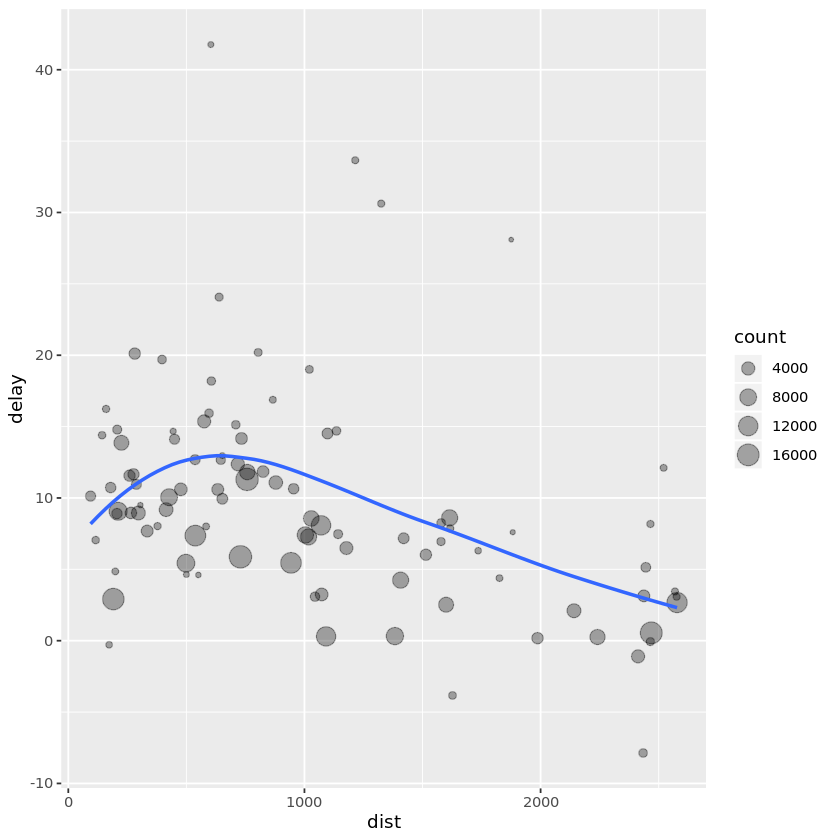

In [78]:
# 假设我们想要研究每个目的地的距离和平均延误时间的关系

# 看以下代码

by_dest <- group_by(flights, dest)# 按dest分组
delay <- summarise(by_dest, 
                  count = n(),
                   # 计数
                  dist = mean(distance, na.rm = T),
                   # 去NA计算均值
                  delay = mean(arr_delay, na.rm = T),
                  )
delay <- filter(delay, count > 20, dest !="HNL")
# 

ggplot(data = delay, mapping = aes(dist, delay)) + 
geom_point(aes(size = count),alpha = 1/3) + 
geom_smooth(se = F)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


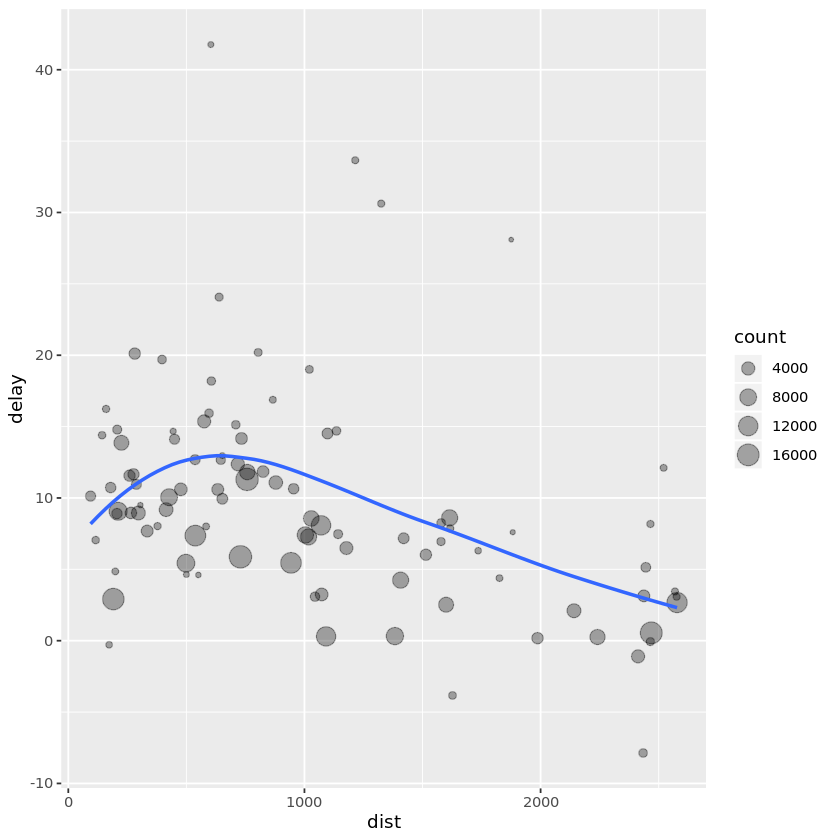

In [79]:
# 上面是没有使用管道的代码，下面看怎么使用管道实现同样操作
delay <- flights %>% group_by(dest) %>% 
summarize(count = n(), 
          dist = mean(distance, na.rm = T),
          delay = mean(arr_delay, na.rm = T)) %>% filter(count > 20, dest != "HNL")
ggplot(data = delay,aes(dist, delay)) + geom_point(aes(size = count),alpha = 1/3) + geom_smooth(se = F)

使用管道的好处就是可读性提高，管道就是将上一步的输出作为下一步的输入进行处理，给人一种连贯性

na.rm = T就是删除缺失值

In [80]:
not_cancelled <- flights %>% filter(!is.na(dep_delay), !is.na(arr_delay))
# filter()筛选函数，！表示非，is.na()判断是否是NA
head(not_cancelled)

# not_cancelled数据集后面会多次用到

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [81]:
head(not_cancelled %>% group_by(year, month, day) %>% summarise(mean = mean(dep_delay)))

year,month,day,mean
<int>,<int>,<int>,<dbl>
2013,1,1,11.435620
2013,1,2,13.677802
2013,1,3,10.907778
2013,1,4,8.965859
2013,1,5,5.732218
2013,1,6,7.145959


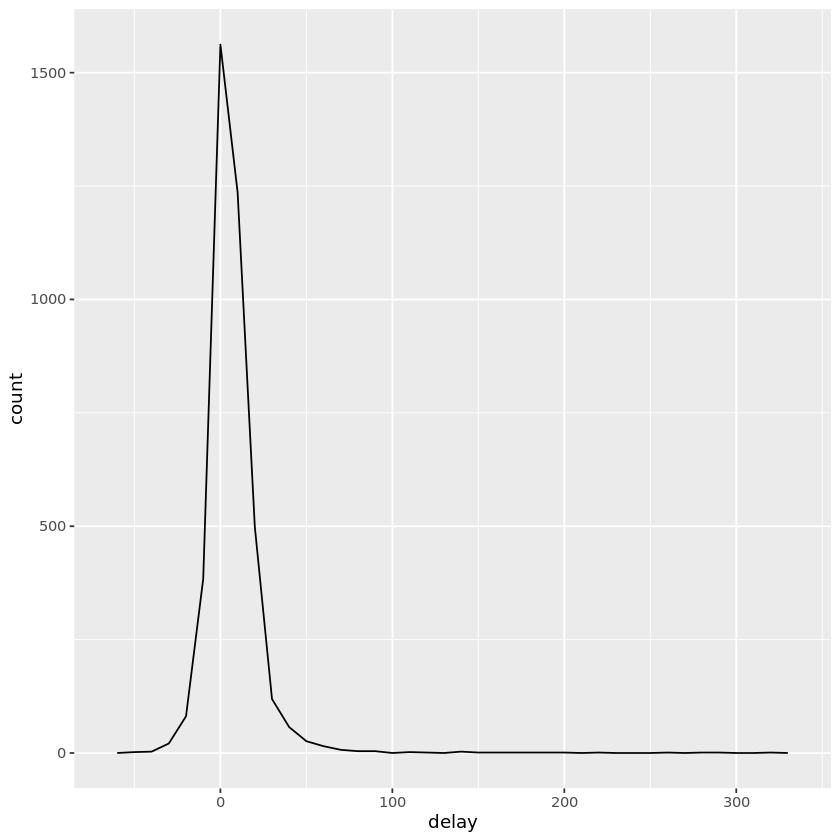

In [82]:
### 计数
# 两个计数函数n()和sum(!is_na())
delays <- not_cancelled %>% group_by(tailnum) %>% summarise(delay = mean(arr_delay))
# 按尾号分组，对arr_delay求均值并计数
ggplot(data = delays, mapping = aes(x = delay)) + geom_freqpoly(binwidth = 10)

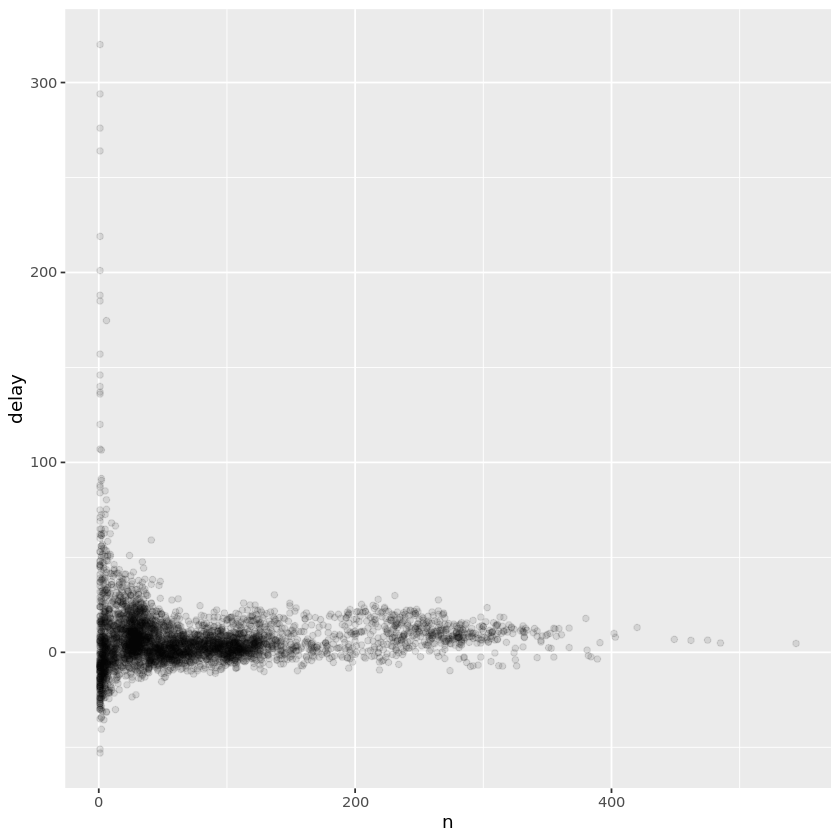

In [83]:
# 绘制航班数量和平均延误时间的散点图
delays <- not_cancelled %>% group_by(tailnum) %>% 
summarise(delay = mean(arr_delay, na.rm = T),n = n())

ggplot(data = delays, mapping = aes(n,delay)) + geom_point(alpha = 1/10)

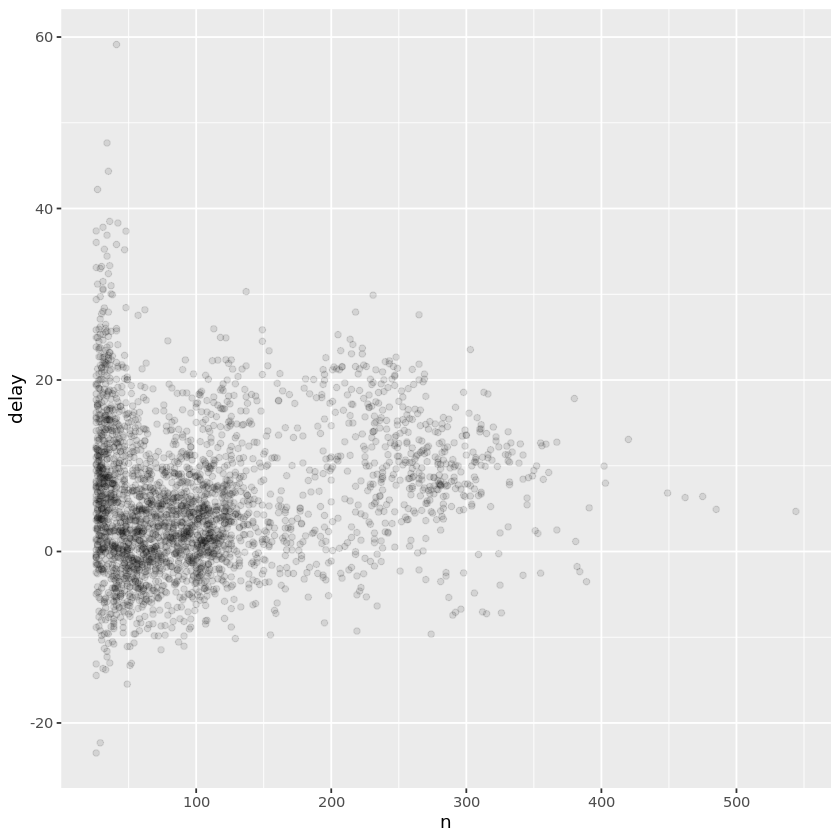

In [84]:
delays %>% filter(n > 25) %>% ggplot(aes(n,delay)) + geom_point(alpha = 1/10)

In [85]:
# 图的解释看书
# 再看一组数据
library(Lahman)
# 转成tibble格式
LahmanData # 和之前见到的数据不同
# 转为tibble数据
head(batting <- as_tibble(Lahman::Batting))

file,class,nobs,nvar,title
<chr>,<chr>,<dbl>,<dbl>,<chr>
AllstarFull,data.frame,4993,8,AllstarFull table
Appearances,data.frame,99466,21,Appearances table
AwardsManagers,data.frame,171,6,AwardsManagers table
AwardsPlayers,data.frame,6026,6,AwardsPlayers table
AwardsShareManagers,data.frame,401,7,AwardsShareManagers table
AwardsSharePlayers,data.frame,6705,7,AwardsSharePlayers table
Batting,data.frame,99846,22,Batting table
BattingPost,data.frame,11294,22,BattingPost table
CollegePlaying,data.frame,17350,3,CollegePlaying table


playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abercda01,1871,1,TRO,NA,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,0


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


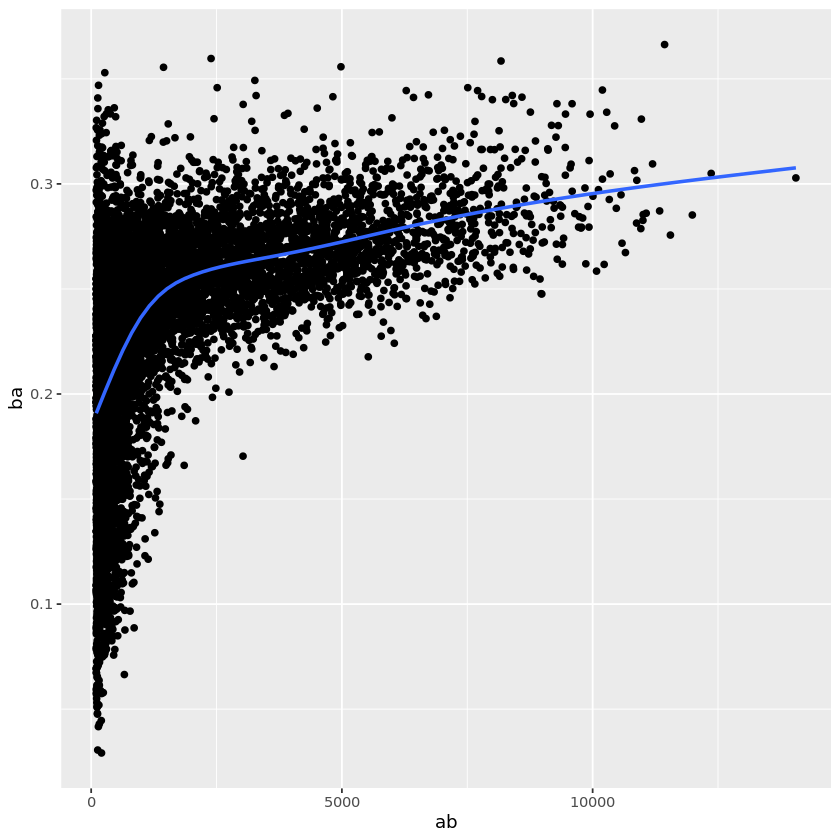

In [86]:
batters <- batting %>% group_by(playerID) %>% 
summarize(ba = sum(H, na.rm = T)/sum(AB,na.rm = T),
 ab = sum(AB, na.rm = T))

batters %>% filter(ab > 100) %>% ggplot(aes(ab,ba)) +
geom_point()+
geom_smooth(se = F)

In [87]:
head(batters %>% arrange(desc(ba)))

playerID,ba,ab
<chr>,<dbl>,<int>
abramge01,1,1
alberan01,1,1
allarko01,1,1
banisje01,1,1
bartocl01,1,1
bassdo01,1,1


### 常用的摘要函数

位置度量：mean()、median()分别是均值、中位数

分散程度度量：sd()、IQR()、mad()分别是标准误差、四分位距、绝对中位差

秩的度量：min()、quantile()、max()分别是最小值、分位数、最大值

定位度量：first()、nth()、last()

计数：n()、sum(!is.na(x))、n_distinct(x)

逻辑值的计数和比例：sum(x > 10)和mean(y == 0)

In [88]:
# 位置度量
not_cancelled %>% group_by(year, month, day) %>% 
summarise(avg_delay1 = mean(arr_delay),
         avg_delay2 = median(arr_delay),
         avg_delay3 = mean(arr_delay[arr_delay > 0])) %>% head()

year,month,day,avg_delay1,avg_delay2,avg_delay3
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2013,1,1,12.651023,3,32.48156
2013,1,2,12.692888,4,32.02991
2013,1,3,5.733333,1,27.66087
2013,1,4,-1.932819,-8,28.30976
2013,1,5,-1.525802,-7,22.55882
2013,1,6,4.236429,-1,24.37270


In [89]:
# 分散程度度量
not_cancelled %>% group_by(dest) %>%
summarise(distance_sd = sd(distance)) %>%
arrange(desc(distance_sd)) %>% head()

dest,distance_sd
<chr>,<dbl>
EGE,10.542765
SAN,10.350094
SFO,10.216017
HNL,10.004197
SEA,9.977993
LAS,9.907786


In [90]:
# 秩的度量
not_cancelled %>% group_by(year, month, day) %>% 
summarise(first = min(dep_time),
         last = max(dep_time),
         half = quantile(dep_time, 0.25)) %>% head()

t(temp <-1:10)
quantile(temp,c(0,0.25,0.5,0.75,1))

year,month,day,first,last,half
<int>,<int>,<int>,<int>,<int>,<dbl>
2013,1,1,517,2356,938.50
2013,1,2,42,2354,911.50
2013,1,3,32,2349,909.00
2013,1,4,25,2358,900.75
2013,1,5,14,2357,859.00
2013,1,6,16,2355,1003.00


1,2,3,4,5,6,7,8,9,10


0%   25%   50%   75%  100% 
 1.00  3.25  5.50  7.75 10.00

In [91]:
# 定位度量
not_cancelled %>% group_by(year, month, day) %>% 
summarise(first_dep = first(dep_time),
         last_dep = last(dep_time),
         second_dep = nth(dep_time, 2)) %>% head()
t(temp)
first(temp)
nth(temp, 2)
last(temp)

year,month,day,first_dep,last_dep,second_dep
<int>,<int>,<int>,<int>,<int>,<int>
2013,1,1,517,2356,533
2013,1,2,42,2354,126
2013,1,3,32,2349,50
2013,1,4,25,2358,106
2013,1,5,14,2357,37
2013,1,6,16,2355,458


1,2,3,4,5,6,7,8,9,10


[1] 1

[1] 2

[1] 10

In [92]:
not_cancelled %>% group_by(year, month, day) %>%
mutate(r = min_rank(desc(dep_time))) %>%
filter(r %in% range(r)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,r
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,831
2013,1,1,2356,2359,-3,425,437,-12,B6,727,N588JB,JFK,BQN,186,1576,23,59,2013-01-01 23:00:00,1
2013,1,2,42,2359,43,518,442,36,B6,707,N580JB,JFK,SJU,189,1598,23,59,2013-01-02 23:00:00,928
2013,1,2,2354,2359,-5,413,437,-24,B6,727,N789JB,JFK,BQN,180,1576,23,59,2013-01-02 23:00:00,1
2013,1,3,32,2359,33,504,442,22,B6,707,N763JB,JFK,SJU,193,1598,23,59,2013-01-03 23:00:00,900
2013,1,3,2349,2359,-10,434,445,-11,B6,739,N729JB,JFK,PSE,199,1617,23,59,2013-01-03 23:00:00,1


In [93]:
not_cancelled %>% group_by(year, month, day) %>%
mutate(r = min_rank(dep_time)) %>%
filter(r %in% range(r)) %>% head()

# 有没有desc()逆序一样

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,r
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,1
2013,1,1,2356,2359,-3,425,437,-12,B6,727,N588JB,JFK,BQN,186,1576,23,59,2013-01-01 23:00:00,831
2013,1,2,42,2359,43,518,442,36,B6,707,N580JB,JFK,SJU,189,1598,23,59,2013-01-02 23:00:00,1
2013,1,2,2354,2359,-5,413,437,-24,B6,727,N789JB,JFK,BQN,180,1576,23,59,2013-01-02 23:00:00,928
2013,1,3,32,2359,33,504,442,22,B6,707,N763JB,JFK,SJU,193,1598,23,59,2013-01-03 23:00:00,1
2013,1,3,2349,2359,-10,434,445,-11,B6,739,N729JB,JFK,PSE,199,1617,23,59,2013-01-03 23:00:00,900


In [94]:
# 看看range()函数，不解释
# range returns a vector containing the minimum and maximum of all the given arguments. 
x <- 1:10
y <- c(2,4,62,6,2,61,9)
range(x)
range(y)

[1]  1 10

[1]  2 62

In [95]:
# 计数
not_cancelled %>% group_by(dest) %>% 
summarise(carriers = n_distinct(carrier)) %>%
arrange(desc(carriers)) %>% head()

dest,carriers
<chr>,<int>
ATL,7
BOS,7
CLT,7
ORD,7
TPA,7
AUS,6


In [96]:
# 因为计数太常用了，所以dplyr提供了一个简单的辅助函数，用于只需要计数的情况：
not_cancelled %>% count(dest) %>% head()

dest,n
<chr>,<int>
ABQ,254
ACK,264
ALB,418
ANC,8
ATL,16837
AUS,2411


In [97]:
# 逻辑值的计数和比例
not_cancelled %>% group_by(year, month, day) %>% 
summarise(n_early = sum(dep_time < 500)) %>% head()

not_cancelled %>% group_by(year, month, day) %>% 
summarise(hour_perc = mean(arr_delay > 60)) %>% head()

year,month,day,n_early
<int>,<int>,<int>,<int>
2013,1,1,0
2013,1,2,3
2013,1,3,4
2013,1,4,3
2013,1,5,3
2013,1,6,2


year,month,day,hour_perc
<int>,<int>,<int>,<dbl>
2013,1,1,0.07220217
2013,1,2,0.08512931
2013,1,3,0.05666667
2013,1,4,0.03964758
2013,1,5,0.03486750
2013,1,6,0.04704463


In [98]:
### 取消分组
daily <-group_by(flights, year, month, day)
head(per_day   <-summarize(daily, flights =n())) 
daily %>% ungroup() %>% summarize(flights = n()) 

year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832


flights
<int>
336776


后面就省略很多了，看书上写的